In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

***
# Serie Compleja de Fourier
***


$$x(t) = \sum_{n=-\infty}^\infty d_n e^{in\omega_0t}$$

$$d_n = \dfrac{1}{T}\int_T x(t)e^{-in\omega_0t}\ dt$$

## Propiedades

Sean $x(t)$ y $y(t)$ dos señales periodicas con periodo $T$ y frecuencia fundamental $\omega_0 = 2\pi/T$, y coeficientes de Fourier $a_n$ y $b_n$, respectivamente.

$$x(t) \longleftrightarrow a_n$$
$$y(t) \longleftrightarrow b_n$$

* ### Linealidad

$$z(t) = Ax(t)+By(t) \longleftrightarrow c_n = Aa_n+Bb_n$$

* ### Desplazamiento en tiempo

$$ x(t-t_0) \longleftrightarrow e^{-in\omega_0t_0}a_n$$

* ### Escalamiento en el tiempo

$$ x(\alpha t) = \sum_{n=-\infty}^\infty a_ne^{in(\alpha\omega_0)t}$$

* ### Multiplicación

$$x(t)\ y(t) \longleftrightarrow c_n=\sum_{l=-\infty}^\infty a_lb_{n-l}$$

* ### Diferenciación en el tiempo

$$\dfrac{d}{dt}x(t) \longleftrightarrow in\omega_0a_n$$

* ### Integración en el tiempo

$$\int_{-\infty}^tx(\tau)d\tau \longleftrightarrow \dfrac{1}{in\omega_0}a_n$$

* ### Relación de Parseval

$$\dfrac{1}{T}\int_T\big|x(t)\big|^2\ dt = \sum_{n=-\infty}^\infty \big| a_n \big|^2 $$

***
## Ejemplo
Determine los coeficientes de la serie de Fourier de la rectificación de onda completa:

$$x(t)=\big|\ \sin\left({2\pi t}\right)\ \big|$$

Haga las gráfica de la señal original en el tiempo y compare con sumas parciales de la serie de Fourier. Haga la gráfica del espectro de frecuencia.

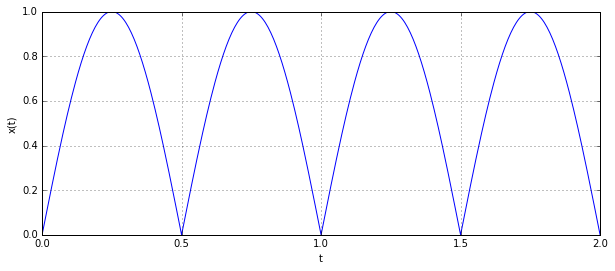

In [2]:
# Graficando la señal x(t)
t = np.linspace(0,2.0,401)
x = abs(np.sin(2*np.pi*t))
plt.figure(figsize=(10,4))
plt.plot(t,x)
plt.ylabel('x(t)')
plt.xlabel('t')
plt.grid(True)
plt.show()

#### Calculando los coeficientes de Fourier:

El periodo de la señal $x(t)$ es $T=1/2$ y la fracuencia fundamental $\omega_0=4\pi$.

\begin{align}
d_0 &=\dfrac{1}{T} \int_T x(t)\ dt =\dfrac{1}{1/2} \int_0^{1/2} \sin(2\pi t)\ dt \\
&= 2\left. \dfrac{-\cos(2\pi t)}{\pi} \right] _0^{1/2} = \dfrac{-(-1)-(-1)}{\pi}\\
&=\dfrac{2}{\pi}\\ \\
d_n &= \dfrac{1}{T} \int_T x(t)e^{-in\omega_0 t}\ dt =\dfrac{1}{1/2}\int_0^{1/2}\sin(2\pi t)e^{-i(4n\pi t)}\ dt \\
&=2\int_0^{1/2}\dfrac{e^{i(2\pi t)}-e^{-i(2\pi t)}}{2i}e^{-i(4n\pi t)}\ dt =-i\int_0^{1/2} e^{i(2 -4n)\pi t}-e^{-i(2 +4n)\pi t}\ dt \\
&= -i\left.\left(\dfrac{e^{i(2 -4n)\pi t}}{i(2 -4n)\pi}-\dfrac{e^{-i(2 +4n)\pi t}}{-i(2 +4n)\pi}\right)\right] _0^{1/2} \\
&= -\dfrac{1}{2\pi}\left( \dfrac{e^{i(1-2n)\pi}}{1-2n}-\dfrac{1}{1-2n}+\dfrac{e^{-i(1+2n)\pi}}{1+2n}-\dfrac{1}{1+2n} \right) \\
&= \dfrac{2}{\pi(1-4n^2)}
\end{align}

In [3]:
# Se define la función que retorna en n-ésimo coeficiente de Fourier
def d(n):
    return 2/(np.pi*(1-4*n**2))

#### Suma parcial de la serie de Fourier:

$$x_N (t) = \sum_{n=-N}^N d_n e^{i\omega_0t}$$

In [4]:
N = 4
t = np.linspace(0,0.5,101)
x = abs(np.sin(2*np.pi*t))
x_N =[ ]
x_N.append(d(0)*np.ones(len(t)))
for n in range(1,N+1):
    x_N.append( d(n)*np.exp(4j*n*np.pi*t) + d(-n)*np.exp(-4j*n*np.pi*t) )

x_N = np.cumsum(x_N, axis=0)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


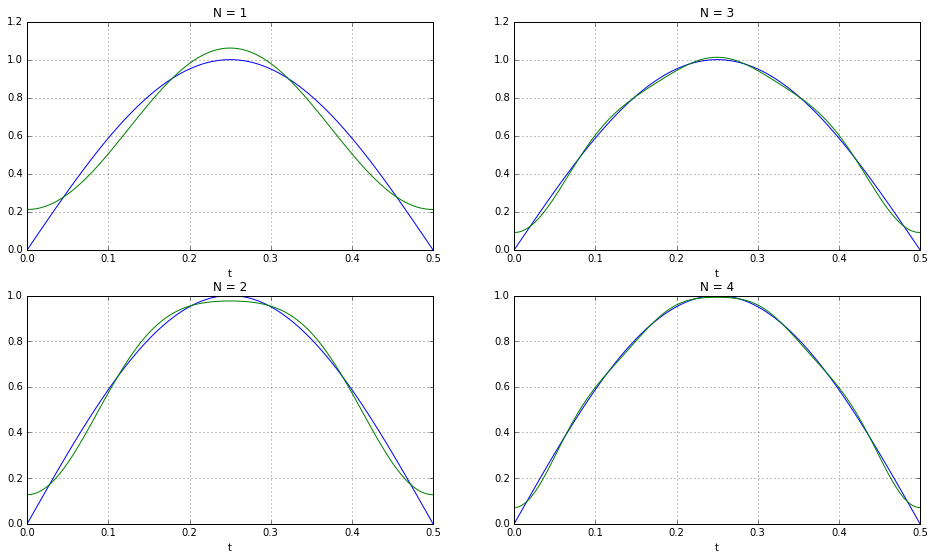

In [5]:
f, axarr = plt.subplots(2,2,figsize=(16,9))
for n in range(N):
    axarr[n%2,n//2].plot(t, x)
    axarr[n%2,n//2].set_title('N = '+str(n+1))
    axarr[n%2,n//2].set_xlabel('t')
    #axarr[n%2,n//2].set_ylabel('x(t)')
    axarr[n%2,n//2].plot(t, x_N[n+1])
    axarr[n%2,n//2].grid(True)
    
plt.show()

#### Espectro de frecuencia

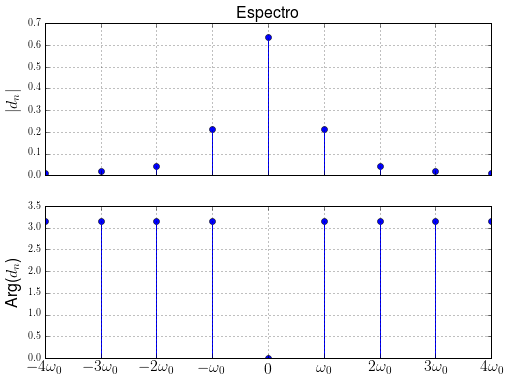

In [6]:
d_n = d(np.arange(-N,N+1))

plt.rc('text', usetex=True)
f, axarr = plt.subplots(2,1,figsize=(8,6),sharex=True)

axarr[0].stem(np.arange(-N,N+1),abs(d_n))
axarr[0].grid(True)
axarr[0].set_title("Espectro", fontsize=16)
axarr[0].set_ylabel("$| d_n |$", fontsize=16)

axarr[1].stem(np.arange(-N,N+1),np.angle(d_n))
axarr[1].grid(True)
axarr[1].set_ylabel("Arg($ d_n$)", fontsize=16)
xticks = []
for n in range(-N,N+1):
    if(n==-1):
        xticks.append(r"$-\omega_0$")
    elif(n==1):
        xticks.append(r"$\omega_0$")
    elif(n==0):
        xticks.append(r"$0$")
    else:
        xticks.append(r"${}\omega_0$".format(n))
        
plt.xticks(np.arange(-N,N+1), xticks,fontsize=16)
plt.show()

***
## Ejemplo

Determine el aporte de potencia de cada armónico de la señal:

$$x(t)=\big|\ \sin\left({2\pi t}\right)\ \big|$$

Calculando la potencia de la señal:

\begin{align}
\dfrac{1}{T}\int_T \big|x(t)\big|^2\ dt
&= \dfrac{1}{1/2}\int_0^{1/2}\big|\sin(2\pi t)\big|^2\ dt
= 2\int_0^{1/2}\sin^2(2\pi t)\ dt \\
&= 2\int_0^{1/2} \dfrac{1-\cos(4\pi t)}{2}\ dt
= 2 \left.\left( \dfrac{t}{2} -\dfrac{\sin(4\pi t)}{8\pi}\right)  \right]_0^{1/2} \\
&= 1/2
\end{align}

Sabiendo que los coeficientes de la serie compleja de Fourier de la señal están dados por:

$$d_n= \dfrac{2}{\pi(1-4n^2)}$$

El aporte de cada componente frecuencial es:

\begin{align}
P_n &=
\big| d_n \big|^2 +\big| d_{-n} \big|^2 \\
&= \left| \dfrac{2}{\pi(1-4n^2)}\right|^2 + \left| \dfrac{2}{\pi(1-4(-n)^2)}\right|^2 \\
&= \dfrac{8}{\pi^2(1-4n^2)^2}
\end{align}

In [7]:
def P(n):
    if (n!=0):
        return 8/(np.pi**2*(1-4*n**2)**2)
    else:
        return 4/(np.pi**2)

In [8]:
P_n = []
for n in range(N):
    P_n.append(P(n))

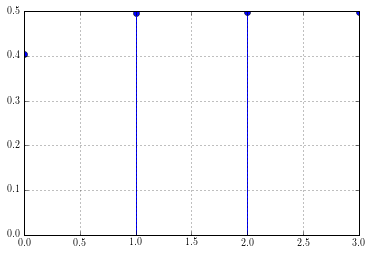

In [9]:
plt.stem(np.cumsum(P_n))
plt.grid(True)
plt.show()

***
# [Fenómeno de Gibbs](https://en.wikipedia.org/wiki/Gibbs_phenomenon)

The Gibbs phenomenon involves both the fact that Fourier sums overshoot at a jump discontinuity, and that this overshoot does not die out as more terms are added to the sum.

## Ejemplo



\begin{equation}
x(t) = \begin{cases}
1 &\text{si $t\le 1/2$}\\
0 &\text{si $t>0$}
\end{cases}
\end{equation}


$T=1$, $\omega_0 = 2\pi$
\begin{align}
d_n &= \dfrac{1}{T} \int_T x(t) e^{-in\omega_0t}\ dt \\
&= \int_0^{1/2} e^{-in\omega_0t}\ dt = \left. \dfrac{e^{-in\omega_0t}}{-in\omega_0} \right]_0^{1/2}\\
&= \dfrac{i}{n\omega_0} (e^{-in\omega_0/2}-1) = \dfrac{i}{n\omega_0} (e^{-in\pi}-1)  \\
&= \dfrac{i((-1)^n-1) }{n\omega_0} \\ \\
d_0 &= \dfrac{1}{T} \int_T x(t) e^{-in\omega_0t}\ dt \\
&= \int_0^{1/2}1 \ dt = \dfrac{1}{2}
\end{align}

In [10]:
# Se define la función que retorna en n-ésimo coeficiente de Fourier
def d(n):
    if n!=0:
        return 1j*((-1)**n-1)/(n*2*np.pi)
    else:
        return 1/2

In [11]:
N = 11
t = np.linspace(0,1,201)
x = signal.square(2*np.pi*t)*0.5+0.5
x_N =[ ]
x_N.append(d(0)*np.ones(len(t)))
for n in range(1,N+1):
    x_N.append( d(n)*np.exp(2j*n*np.pi*t) + d(-n)*np.exp(-2j*n*np.pi*t) )

x_N = np.cumsum(x_N, axis=0)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


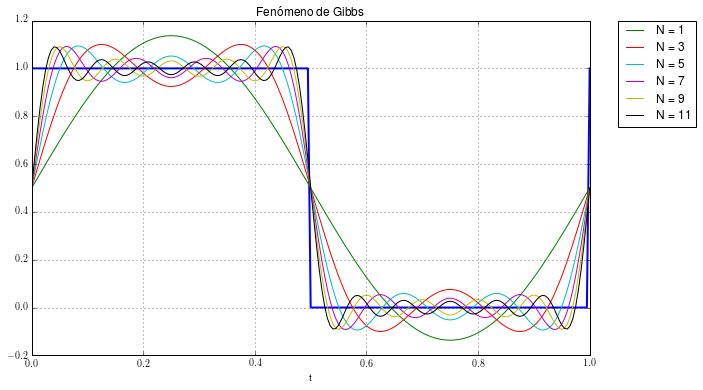

In [12]:
plt.figure(figsize=(10,6))
plt.plot(t, x, linewidth=2.0)
for n in range(1,(N+1),2):
    plt.plot(t, x_N[n], label='N = '+str(n))
    
plt.title(r'Fen\'omeno de Gibbs')
plt.xlabel('t')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

***
# Problemas
***

Encuentre la serie de Fourier de la función y la gráfica de $f$ y de la $N$-ésima suma parcial para $N=5,10,15,25$ en el intervalo. Indique cualquier lugar, en esta gráfica donde aparezca el fenómeno de Gibbs.

0. $f(x) = \begin{cases}
2x &\text{para $-3\le x<-2$}\\
0 &\text{para $-2\le x <1$}\\
x^2 &\text{para $1\le x\le 3$}
\end{cases}$
0. $f(x) = x^2$ para $-2\le x \le 2$
0. $f(x) = x^2e^{-x}$ para $-3\le x \le 3$
0. $f(x) = \begin{cases}
2x-2 &\text{para $-\pi\le x\le1$}\\
3 &\text{para $1< x \le\pi$}
\end{cases}$
